In [20]:
import pandas as pd

In [21]:
import numpy as np

In [32]:
pers = pd.read_excel('Crash_Qtr01_2015.xlsx',sheet_name='PERSON')
accd = pd.read_excel('Crash_Qtr01_2015.xlsx',sheet_name='ACCIDENT')
vehc = pd.read_excel('Crash_Qtr01_2015.xlsx',sheet_name='VEHICLE')

In [223]:
accd_var = ['REPORT_NO','ACC_DATE','ACC_TIME','COLLISION_TYPE_CODE','C_M_ZONE_FLAG',\
            'JUNCTION_CODE','LANE_CODE','LIGHT_CODE','RD_COND_CODE','RD_DIV_CODE',\
            'SURF_COND_CODE','WEATHER_CODE','HARM_EVENT_CODE2']

In [224]:
filter_accid = accd[accd_var]
filter_accid['TIME'] = pd.to_datetime(filter_accid['ACC_DATE'] +' '+ filter_accid['ACC_TIME'])
filter_accid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25207 entries, 0 to 25206
Data columns (total 14 columns):
REPORT_NO              25207 non-null object
ACC_DATE               25207 non-null object
ACC_TIME               25207 non-null object
COLLISION_TYPE_CODE    25207 non-null int64
C_M_ZONE_FLAG          25207 non-null object
JUNCTION_CODE          22402 non-null float64
LANE_CODE              18295 non-null float64
LIGHT_CODE             25207 non-null float64
RD_COND_CODE           22402 non-null float64
RD_DIV_CODE            22402 non-null float64
SURF_COND_CODE         22402 non-null float64
WEATHER_CODE           25207 non-null float64
HARM_EVENT_CODE2       25207 non-null float64
TIME                   25207 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(1), object(4)
memory usage: 2.7+ MB


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [133]:
pers_var = ['REPORT_NO','CDL_FLAG','CONDITION_CODE','DATE_OF_BIRTH',\
            'EQUIP_PROB_CODE','FAULT_FLAG','INJ_SEVER_CODE','PERSON_TYPE',\
            'PERSON_ID','SAF_EQUIP_CODE','SEX_CODE']

In [134]:
filter_person = pers[pers_var]
filter_person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51580 entries, 0 to 51579
Data columns (total 11 columns):
REPORT_NO          51580 non-null object
CDL_FLAG           38799 non-null object
CONDITION_CODE     39592 non-null float64
DATE_OF_BIRTH      49218 non-null object
EQUIP_PROB_CODE    50676 non-null float64
FAULT_FLAG         38806 non-null object
INJ_SEVER_CODE     51580 non-null int64
PERSON_TYPE        51580 non-null object
PERSON_ID          51580 non-null object
SAF_EQUIP_CODE     51580 non-null float64
SEX_CODE           49312 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 4.3+ MB


In [135]:
vehc_var = ['REPORT_NO','AREA_DAMAGED_CODE_MAIN','BODY_TYPE_CODE',\
            'DAMAGE_CODE','HIT_AND_RUN_FLAG','MOVEMENT_CODE','VEHICLE_ID']

In [136]:
filter_vehic = vehc[vehc_var]
filter_vehic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45588 entries, 0 to 45587
Data columns (total 7 columns):
REPORT_NO                 45588 non-null object
AREA_DAMAGED_CODE_MAIN    43486 non-null float64
BODY_TYPE_CODE            45579 non-null float64
DAMAGE_CODE               45588 non-null int64
HIT_AND_RUN_FLAG          45588 non-null object
MOVEMENT_CODE             45588 non-null float64
VEHICLE_ID                45588 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 2.4+ MB


In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='white')

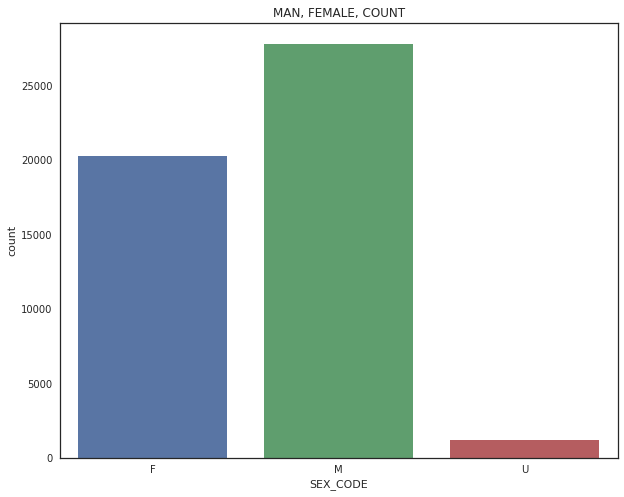

In [138]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.set_title('MAN, FEMALE, COUNT')
sns.countplot(x='SEX_CODE',data=filter_person,ax=ax)

In [140]:
age  = filter_person['DATE_OF_BIRTH'].dropna()
number_age = age.map(lambda x: 2015 - int('20'+x.split('-')[-1])  if int(x.split('-')[-1])< 10  else  2015 -int('19'+x.split('-')[-1]))

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


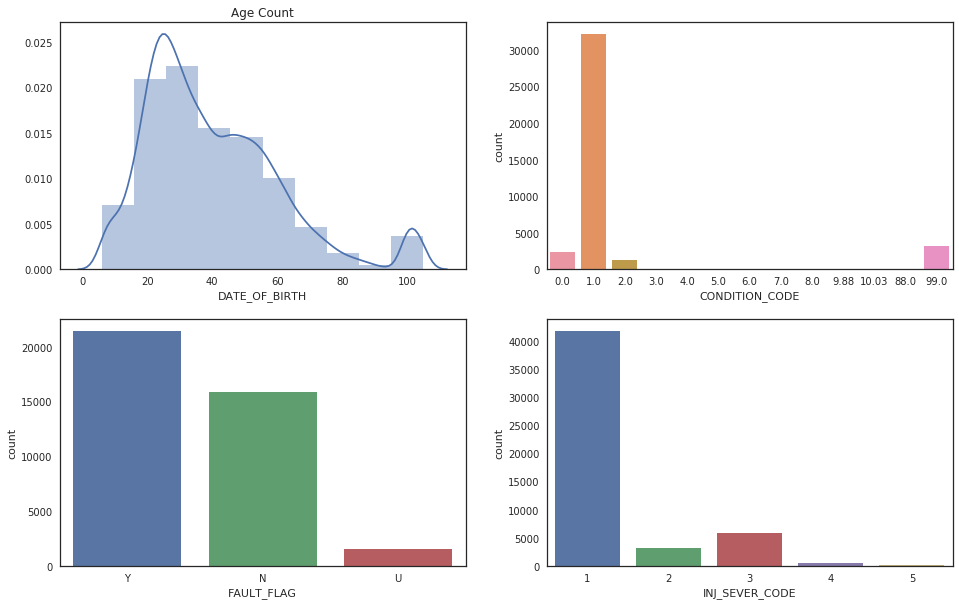

In [226]:
fig, axs = plt.subplots(2,2,figsize=(16,10))

sns.distplot( number_age,kde=True,norm_hist=False, bins=10, ax=axs[0,0])
axs[0,0].set_title('Age Count')
sns.countplot( filter_person['CONDITION_CODE'], ax=axs[0,1])
sns.countplot( filter_person['FAULT_FLAG'],ax=axs[1,0])
sns.countplot( filter_person['INJ_SEVER_CODE'], ax=axs[1,1])


In [167]:
from datetime import datetime

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Day of Week')

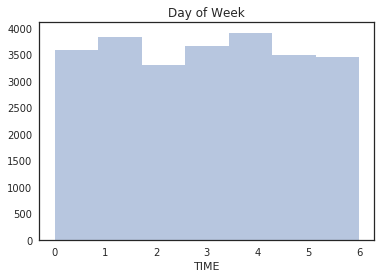

In [173]:
weekday = filter_accid['TIME'].map(lambda x: x.weekday())
ax = sns.distplot(weekday,kde=False,bins=7)
ax.set_title('Day of Week')

In [179]:
daynight = filter_accid['TIME'].map(lambda x: int(datetime.strftime(x,'%H')))

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Hours')

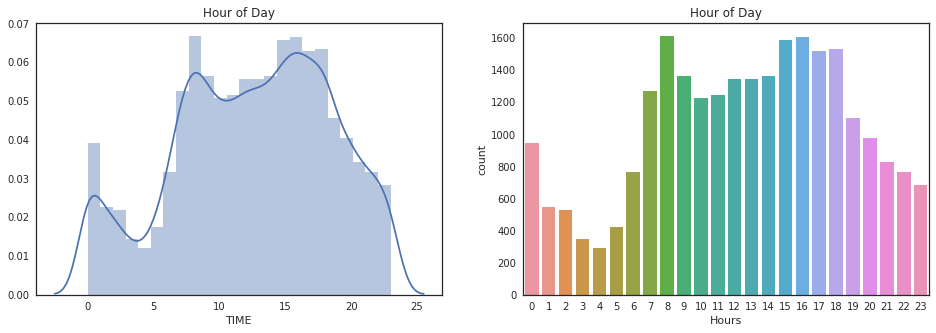

In [194]:

fx ,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.set_title('Hour of Day')
sns.distplot(daynight,kde=True,bins=24,ax=ax1)

ax2.set_title('Hour of Day')
sns.countplot(daynight,ax=ax2)
ax2.set_xlabel('Hours')



In [198]:
month = filter_accid['TIME'].map(lambda x: int(datetime.strftime(x,'%m')))

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Month')

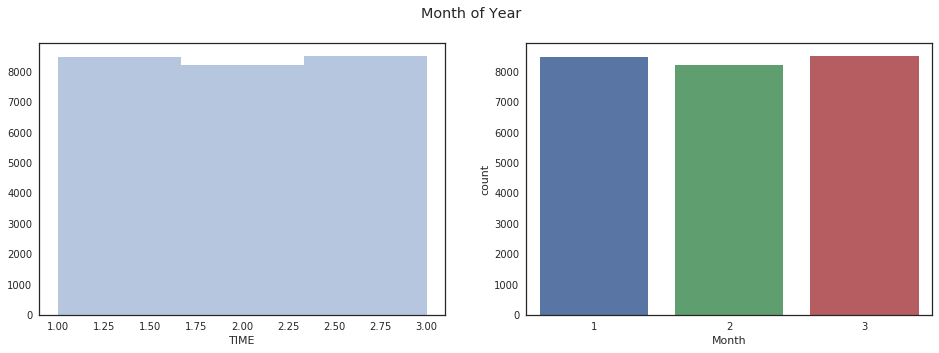

In [202]:
fx ,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
fx.suptitle('Month of Year')
#ax1.set_title('Month of Year')
sns.distplot(month,kde=False,bins=3,ax=ax1)

#ax2.set_title('Hour of Day')
sns.countplot(month,ax=ax2)
ax2.set_xlabel('Month')

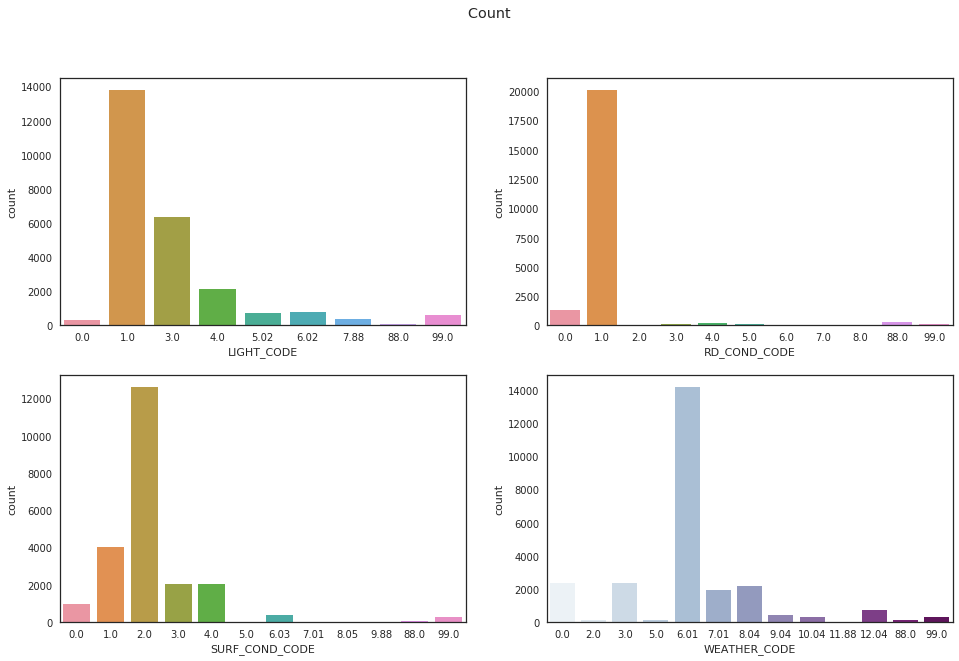

In [217]:
fig, axs = plt.subplots(2,2,figsize=(16,10))
fig.suptitle('Count ')
sns.countplot(filter_accid['LIGHT_CODE'],ax=axs[0,0])
#axs[0,0].set_title('LIGHT')

sns.countplot(filter_accid['RD_COND_CODE'],ax=axs[0,1])
#axs[0,1].set_title('ROAD COND')

sns.countplot(filter_accid['SURF_COND_CODE'],ax=axs[1,0])
#axs[1,0].set_title('SURF COND')

sns.countplot(filter_accid['WEATHER_CODE'],palette="BuPu",ax=axs[1,1])
#axs[1,1].set_title('WEATHER')

#sns.factorplot(x="WEATHER_CODE", data=filter_accid, kind="count", palette="BuPu", size=6, aspect=1.5,ax=axs[1,1])

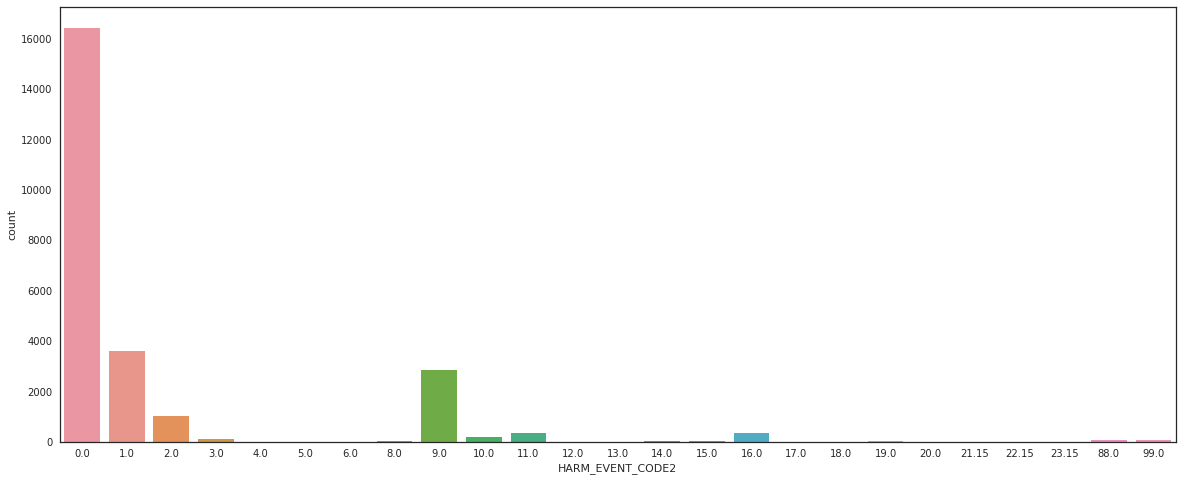

In [231]:
plt.figure(figsize=(20,8))
sns.countplot(x='HARM_EVENT_CODE2', data=filter_accid )

In [259]:
fatal_accd = filter_accid[ filter_accid['REPORT_NO'].isin(filter_person[filter_person['INJ_SEVER_CODE'].isin([4])]['REPORT_NO']) ]

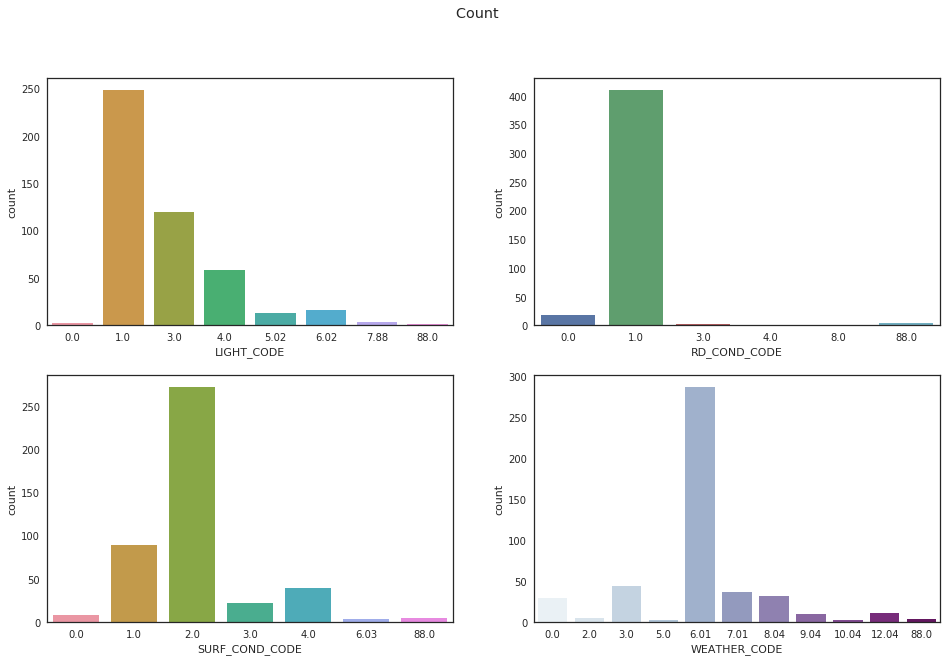

In [260]:
fig, axs = plt.subplots(2,2,figsize=(16,10))
fig.suptitle('Count ')
sns.countplot(fatal_accd['LIGHT_CODE'],ax=axs[0,0])

sns.countplot(fatal_accd['RD_COND_CODE'],ax=axs[0,1])

sns.countplot(fatal_accd['SURF_COND_CODE'],ax=axs[1,0])

sns.countplot(fatal_accd['WEATHER_CODE'],palette="BuPu",ax=axs[1,1])

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Hours')

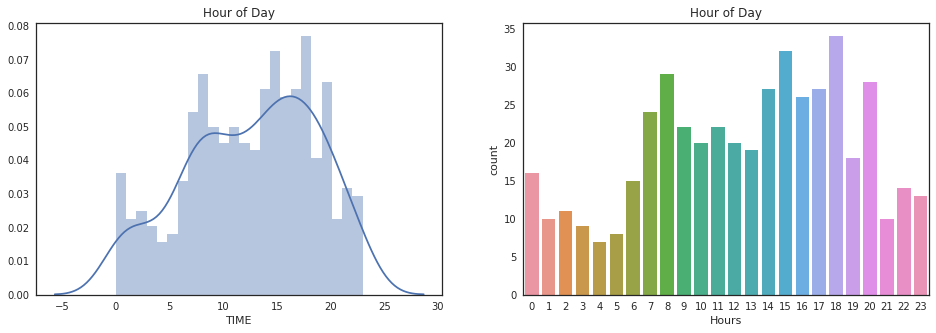

In [261]:
daynight = fatal_accd['TIME'].map(lambda x: int(datetime.strftime(x,'%H')))
fx ,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.set_title('Hour of Day')
sns.distplot(daynight,kde=True,bins=24,ax=ax1)

ax2.set_title('Hour of Day')
sns.countplot(daynight,ax=ax2)
ax2.set_xlabel('Hours')
